# Capstone project stage 1 u3244749

Notes: Data set has been reduced due to file size constraints when implimenting GUI. Data set now only contains 100 images from each "Healthy" class of plants.
- Each file has been manually reduced to 100 files for each class.
- "Wheat_Healthy" only has 58 files creating a bias to the other classes
- "Corn_Healthy" was completly annulled due to file compatibility and naming   

Problem statement in the context of the provided dataset:

- The dataset consists of images covering a varity of different plants
- The images are a varity of different sizes and qualities
- The file paths are seperated by the name of the plant followed by "_Healthy"
- The dataset can be used to develop a plant classifier for the plants included with room for it to be expanded.


Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing relevant python libraries

In [ ]:
import cv2
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
import numpy as np
%matplotlib inline

Testing file paths by reading and displaying images


```
# cv2.cvtColor(<INSERT IMAGE NAME HERE>, cv2.COLOR_BGR2RGB)

# This code is used to translate BRG to RGB due to the fact that openCV and matplotlib use the seperate formats
```



(<matplotlib.image.AxesImage at 0x7b3b541bdb70>,
 Text(0.5, 1.0, 'Original Image\n Chili'))

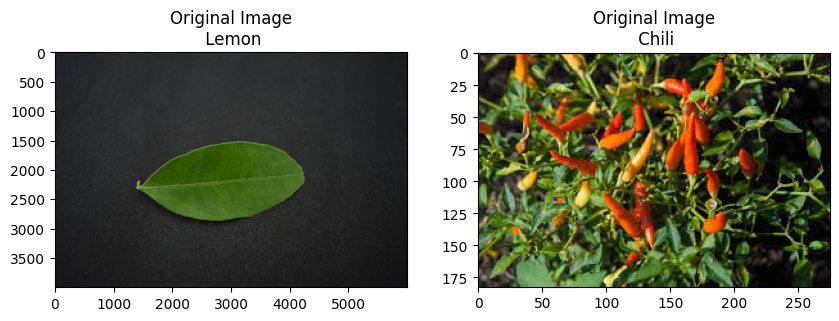

In [ ]:
#Read and Display Images

img_path_1 = '/content/drive/MyDrive/ST1_Capstone/Lemon__healthy/0010_0001.JPG'
img_path_2 = '/content/drive/MyDrive/ST1_Capstone/Chili__healthy/Cabai_sehat005.jpg'
img_1 = cv2.imread(img_path_1)
img_2 = cv2.imread(img_path_2)
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)),plt.title('Original Image\n Lemon')
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)),plt.title('Original Image\n Chili')

The images above are two samples from the several classes selected from the data set. There are two very different images so it makes it easier for a user to see the differences bewtween the images when using exploritory data analysis

Gemoetric transformation analysis of images

(<matplotlib.image.AxesImage at 0x7b3b545979d0>,
 Text(0.5, 1.0, 'Transposed image\n Chili'))

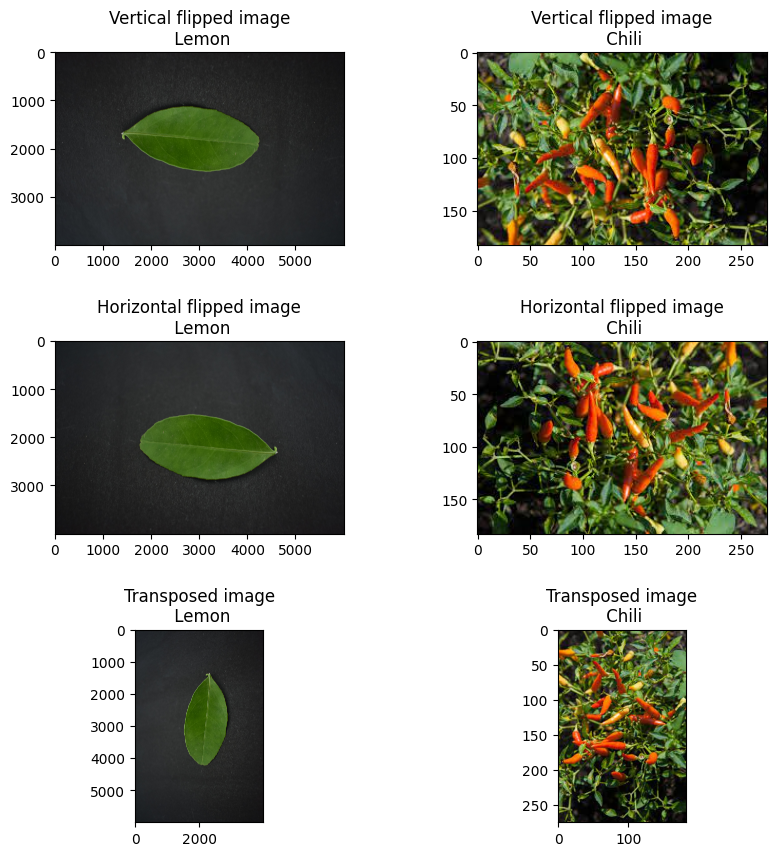

In [ ]:
img_path_1 = '/content/drive/MyDrive/ST1_Capstone/Lemon__healthy/0010_0001.JPG'
img_path_2 = '/content/drive/MyDrive/ST1_Capstone/Chili__healthy/Cabai_sehat005.jpg'
img_1 = cv2.imread(img_path_1)
img_2 = cv2.imread(img_path_2)

#Basic image manipulation (rotating/flipping/transpose)
flip_img_v1=cv2.flip(img_1,0) # vertical flip
flip_img_v2=cv2.flip(img_2,0) # vertical flip
#horizontal flip
flip_img_h1=cv2.flip(img_1,1) # horizontal flip
flip_img_h2=cv2.flip(img_2,1) # horizontal flip
#transpose
transp_img_1=cv2.transpose(img_1,1) # transpose
transp_img_2=cv2.transpose(img_2,1) # transpose

plt.figure(figsize=(10,10))
# Increase the spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.subplot(321)

plt.imshow(cv2.cvtColor(flip_img_v1, cv2.COLOR_BGR2RGB)),plt.title('Vertical flipped image\n Lemon')
plt.subplot(322)
plt.imshow(cv2.cvtColor(flip_img_v2, cv2.COLOR_BGR2RGB)),plt.title('Vertical flipped image\n Chili')
plt.subplot(323)
plt.imshow(cv2.cvtColor(flip_img_h1, cv2.COLOR_BGR2RGB)), plt.title('Horizontal flipped image\n Lemon')
plt.subplot(324)
plt.imshow(cv2.cvtColor(flip_img_h2, cv2.COLOR_BGR2RGB)), plt.title('Horizontal flipped image\n Chili')
plt.subplot(325)
plt.imshow(cv2.cvtColor(transp_img_1, cv2.COLOR_BGR2RGB)),plt.title('Transposed image\n Lemon')
plt.subplot(326)
plt.imshow(cv2.cvtColor(transp_img_2, cv2.COLOR_BGR2RGB)),plt.title('Transposed image\n Chili')

When geometrically manipulated, the images do not look dissimlar from the original. Thus making it easier when attempting to compare the model to a test image

Comparing the images when turned grey

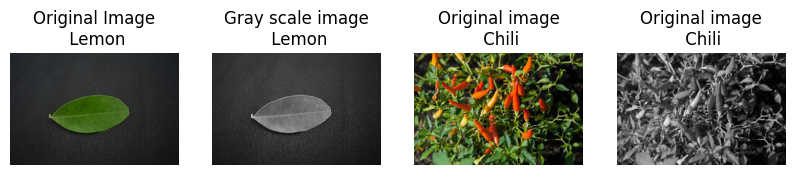

In [ ]:
img_path_1 = '/content/drive/MyDrive/ST1_Capstone/Lemon__healthy/0010_0001.JPG'
img_path_2 = '/content/drive/MyDrive/ST1_Capstone/Chili__healthy/Cabai_sehat005.jpg'
img_1 = cv2.imread(img_path_1)
img_2 = cv2.imread(img_path_2)

fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(10, 10))

ax1.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image\n Lemon')
ax1.set_axis_off()

ax2.imshow(skic.rgb2gray(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)), cmap ='gray')
ax2.set_title('Gray scale image\n Lemon')
ax2.set_axis_off()

ax3.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
ax3.set_title('Original image\n Chili')
ax3.set_axis_off()


ax4.imshow(skic.rgb2gray(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)),cmap = 'gray')
ax4.set_title('Original image\n Chili')
ax4.set_axis_off()

When the images are turned grey, they loose a lot of edge clarity making it harder to tell them apart. In the instances above they are easy to tell apart however, when applied to other images in the dataset it may make the model less confident.

Introducing noise to images

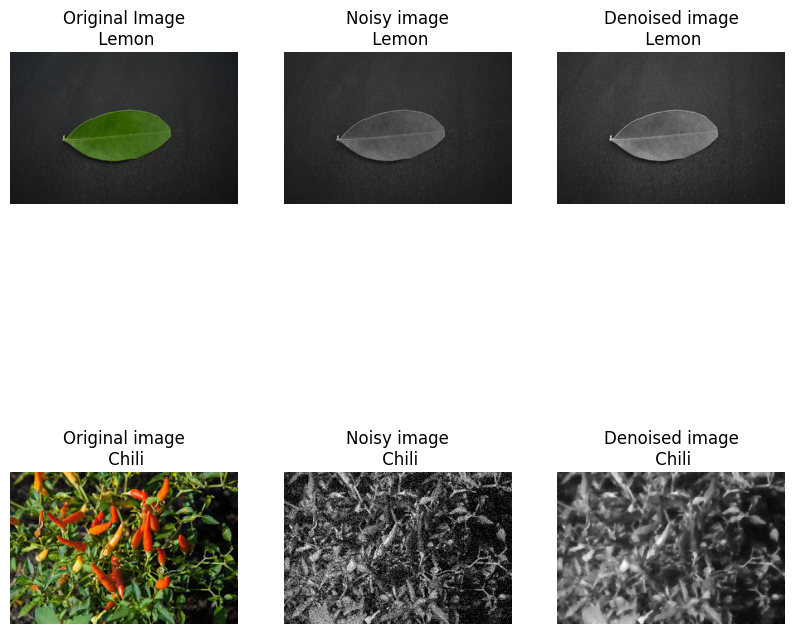

In [ ]:
img_path_1 = '/content/drive/MyDrive/ST1_Capstone/Lemon__healthy/0010_0001.JPG'
img_path_2 = '/content/drive/MyDrive/ST1_Capstone/Chili__healthy/Cabai_sehat005.jpg'
img_1 = cv2.imread(img_path_1)
img_2 = cv2.imread(img_path_2)

img_1_n = sku.random_noise(skic.rgb2gray(img_1))
img_1_d = skimage.restoration.denoise_tv_bregman(img_1_n, 5.)

img_2_n = sku.random_noise(skic.rgb2gray(img_2))
img_2_d = skimage.restoration.denoise_tv_bregman(img_2_n, 5.)


fig, ((ax1, ax2,ax3), (ax4, ax5,ax6)) = plt.subplots(ncols=3,nrows=2,figsize=(10, 10))

ax1.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image\n Lemon')
ax1.set_axis_off()

ax2.imshow(img_1_n, cmap ='gray')
ax2.set_title('Noisy image\n Lemon')
ax2.set_axis_off()

ax3.imshow(img_1_d, cmap = 'gray')
ax3.set_title('Denoised image\n Lemon')
ax3.set_axis_off()

ax4.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
ax4.set_title('Original image\n Chili')
ax4.set_axis_off()

ax5.imshow(img_2_n, cmap ='gray')
ax5.set_title('Noisy image\n Chili')
ax5.set_axis_off()

ax6.imshow(img_2_d, cmap = 'gray')
ax6.set_title('Denoised image\n Chili')
ax6.set_axis_off()

Again, similar to shifting to grey edge clarity is lost. This is made even more apparent when adding and removing noise from the image

Using canny edge detection to determine class

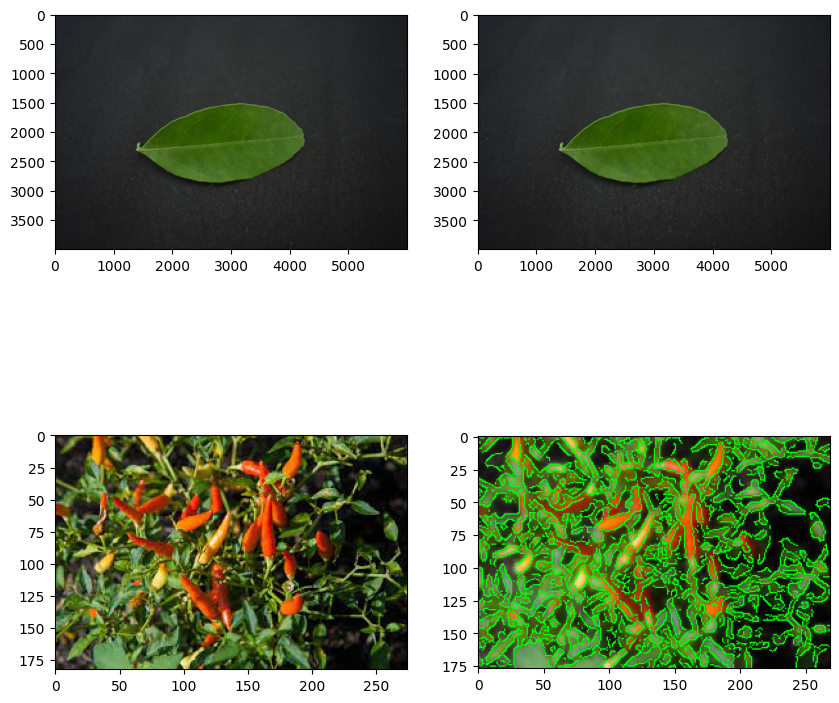

In [ ]:
img_path_1 = '/content/drive/MyDrive/ST1_Capstone/Lemon__healthy/0010_0001.JPG'
img_path_2 = '/content/drive/MyDrive/ST1_Capstone/Chili__healthy/Cabai_sehat005.jpg'
img_1 = cv2.imread(img_path_1)
img_2 = cv2.imread(img_path_2)

th1=30
th2=60
d=3

edgeresult_1=img_1.copy()
edgeresult_1 = cv2.GaussianBlur(edgeresult_1, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_1 = cv2.cvtColor(edgeresult_1, cv2.COLOR_BGR2GRAY)
edge_1 = cv2.Canny(gray_1, th1, th2)
edgeresult_1[edge_1 != 0] = (0, 255, 0)

edgeresult_2=img_2.copy()
edgeresult_2 = cv2.GaussianBlur(edgeresult_2, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_2 = cv2.cvtColor(edgeresult_2, cv2.COLOR_BGR2GRAY)
edge_2 = cv2.Canny(gray_2, th1, th2)
edgeresult_2[edge_2 != 0] = (0, 255, 0)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.subplot(222)
plt.imshow(cv2.cvtColor(edgeresult_1, cv2.COLOR_BGR2RGB))
plt.subplot(223)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
plt.subplot(224)
plt.imshow(cv2.cvtColor(edgeresult_2, cv2.COLOR_BGR2RGB))

The edge detection on the images is highlighted in green in this instance. As far as the chili is concerned the edges are clearly visable where as the leaf has a faint edge recognised along the top of the leaf. This means that the data model maybe more confident with some classes compared to others.